<a href="https://colab.research.google.com/github/jadesola123/Predict-Career-Longevity-for-NBA-Rookies/blob/main/Predict_Career_Longevity_for_NBA_Rookies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
#importing libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display

from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold, learning_curve
import xgboost as xgb
import lightgbm as lgbm

In [17]:
#Reading the training data
train_data = pd.read_csv('/content/Train_data.csv')
print("Train data head 👇🏾")
print(train_data.head())
test_data = pd.read_csv("/content/Test_data.csv")
print("test data head 👇🏾")
print(test_data.head())

Train data head 👇🏾
     GP   MIN   PTS  FGM  FGA   FG%  3P Made  3PA   3P%  FTM  FTA   FT%  OREB  \
0  59.0  12.8   3.4  1.3  2.6  51.0      0.2  0.3  50.0  0.7  0.8  78.0   1.1   
1  31.0  10.7   3.4  1.2  3.3  35.3      0.5  2.1  25.8  0.5  0.9  55.2   0.3   
2  48.0   9.3   4.5  1.7  3.4  49.7      0.0  0.1   0.0  1.2  1.9  61.5   0.4   
3  80.0  27.7  11.2  3.5  9.4  37.4      1.3  4.1  32.9  2.8  3.3  85.0   0.8   
4  58.0  18.4   5.8  1.9  5.3  36.7      0.0  0.1  25.0  1.9  3.1  61.7   0.5   

   DREB  REB  AST  STL  BLK  TOV  Target  
0   2.3  3.3  0.5  0.3  0.4  0.5       1  
1   1.1  1.4  0.4  0.3  0.1  0.2       0  
2   0.8  1.2  0.8  0.5  0.4  1.0       0  
3   1.6  2.4  3.9  1.3  0.1  2.2       1  
4   0.7  1.2  1.9  1.1  0.2  1.7       0  
test data head 👇🏾
     GP   MIN  PTS  FGM  FGA   FG%  3P Made  3PA   3P%  FTM  FTA   FT%  OREB  \
0  44.0  13.0  6.6  2.5  5.6  45.3      0.4  1.3  32.7  1.1  1.7  65.3   0.8   
1  51.0   9.1  2.7  1.0  2.7  39.0      0.1  0.3  23.5  0.

In [15]:
#understanding the data
print(train_data.shape)
print(train_data.describe())

(1101, 20)
                GP          MIN          PTS          FGM          FGA  \
count  1101.000000  1101.000000  1101.000000  1101.000000  1101.000000   
mean     59.008156    16.928284     6.502344     2.511125     5.645747   
std      17.236886     8.034209     4.163856     1.611502     3.422292   
min      11.000000     3.100000     1.100000     0.400000     1.000000   
25%      46.223257    10.492268     3.587756     1.400000     3.200000   
50%      59.387147    15.386486     5.200000     2.000000     4.600000   
75%      76.000000    21.830403     8.300000     3.200000     6.900000   
max      82.000000    40.900000    24.300000     9.000000    18.900000   

               FG%      3P Made          3PA          3P%          FTM  \
count  1101.000000  1101.000000  1101.000000  1101.000000  1101.000000   
mean     43.912555     0.241959     0.767455    19.050425     1.241914   
std       6.106910     0.363008     1.017214    15.513640     0.937585   
min      25.000000     0.0

Data Cleaning🧹🧼

In [10]:
train_data.drop_duplicates()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,Target
0,59.0,12.8,3.4,1.3,2.6,51.0,0.2,0.3,50.0,0.7,0.8,78.0,1.1,2.3,3.3,0.5,0.3,0.4,0.5,1
1,31.0,10.7,3.4,1.2,3.3,35.3,0.5,2.1,25.8,0.5,0.9,55.2,0.3,1.1,1.4,0.4,0.3,0.1,0.2,0
2,48.0,9.3,4.5,1.7,3.4,49.7,0.0,0.1,0.0,1.2,1.9,61.5,0.4,0.8,1.2,0.8,0.5,0.4,1.0,0
3,80.0,27.7,11.2,3.5,9.4,37.4,1.3,4.1,32.9,2.8,3.3,85.0,0.8,1.6,2.4,3.9,1.3,0.1,2.2,1
4,58.0,18.4,5.8,1.9,5.3,36.7,0.0,0.1,25.0,1.9,3.1,61.7,0.5,0.7,1.2,1.9,1.1,0.2,1.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,49.0,8.3,4.5,1.8,3.9,46.6,0.0,0.1,0.0,0.8,1.2,70.2,0.6,0.7,1.3,0.5,0.3,0.3,0.6,1
1097,35.0,5.5,1.5,0.5,1.4,36.0,0.4,1.1,33.3,0.1,0.1,100.0,0.1,0.6,0.7,0.2,0.1,0.0,0.1,1
1098,65.0,13.2,5.0,2.0,5.0,41.3,0.1,0.3,35.0,0.8,1.0,76.9,0.6,1.0,1.6,1.1,0.7,0.3,0.8,0
1099,55.0,14.9,4.1,1.7,4.1,41.7,0.1,0.1,37.5,0.6,0.8,76.1,0.5,1.0,1.5,1.5,0.7,0.2,0.8,0


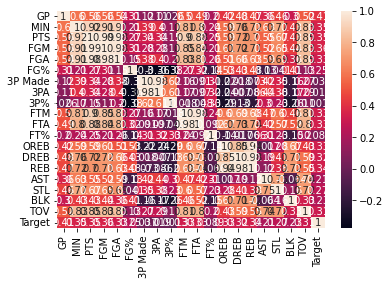

In [11]:
#getting ther corr matrix

corrMatrix = train_data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [12]:
X_train = train_data.drop(labels = ["Target"],axis=1)
y_train = train_data["Target"]
X_test = test_data

In [19]:
#Data Scaling
columns = list(train_data.columns)
columns.pop()

'Target'

In [20]:
columns

['GP',
 'MIN',
 'PTS',
 'FGM',
 'FGA',
 'FG%',
 '3P Made',
 '3PA',
 '3P%',
 'FTM',
 'FTA',
 'FT%',
 'OREB',
 'DREB',
 'REB',
 'AST',
 'STL',
 'BLK',
 'TOV']

In [21]:
#Normalization
X_train = preprocessing.normalize(X_train)
X_test = preprocessing.normalize(X_test)

In [22]:
X_train = pd.DataFrame(X_train, columns = columns)
X_test = pd.DataFrame(X_test)

In [23]:
kfold = StratifiedKFold(n_splits=10)
random_state = 6

logistic_model = LogisticRegression(random_state=random_state).fit(X_train,y_train)
knn_model = KNeighborsClassifier().fit(X_train, y_train)
decision_model = DecisionTreeClassifier(random_state=random_state).fit(X_train,y_train)
mlp_model = MLPClassifier(random_state=random_state).fit(X_train, y_train)
gaussian_model = GaussianNB().fit(X_train, y_train)
linear_svm_model = SVC(kernel='linear').fit(X_train,y_train)
adaboost_model = AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state, learning_rate=0.1).fit(X_train,y_train)
randomforest_model = RandomForestClassifier(random_state=random_state).fit(X_train,y_train)
extra_model = ExtraTreesClassifier(random_state=random_state).fit(X_train,y_train)
gb_model = GradientBoostingClassifier(random_state=random_state).fit(X_train,y_train)
xgb_model = xgb.XGBClassifier().fit(X_train,y_train)
lgbm_model = lgbm.LGBMClassifier().fit(X_train,y_train)

model_names = ["Logistic","Knn","DecisionTree","MLP","GaussianNB","SupportVectorMachine","AdaBoost","RandomForest","ExtraTrees","GradientBoost","Xgboost","Lightgbm"]
model_list = [logistic_model,decision_model,mlp_model,knn_model,gaussian_model,linear_svm_model,adaboost_model,randomforest_model,extra_model,gb_model,xgb_model,lgbm_model]
results = []
for i in model_list:
    result = cross_val_score(i, X_train, y_train, scoring = "accuracy", cv = kfold, n_jobs=4)
    results.append(result.mean())
    
acc_of_models = {"Model": model_names, "Mean Accuracy": results}    
acc_of_models = pd.DataFrame(acc_of_models)
acc_of_models


,Model,Mean Accuracy
0,Logistic,0.669353
1,Knn,0.635790
2,DecisionTree,0.679345
3,MLP,0.684021
4,GaussianNB,0.652088
5,SupportVectorMachine,0.665725
6,AdaBoost,0.662105
7,RandomForest,0.709378
8,ExtraTrees,0.719369
9,GradientBoost,0.702080


Text(0.5, 1.0, 'Feature Importance in RandomForests')

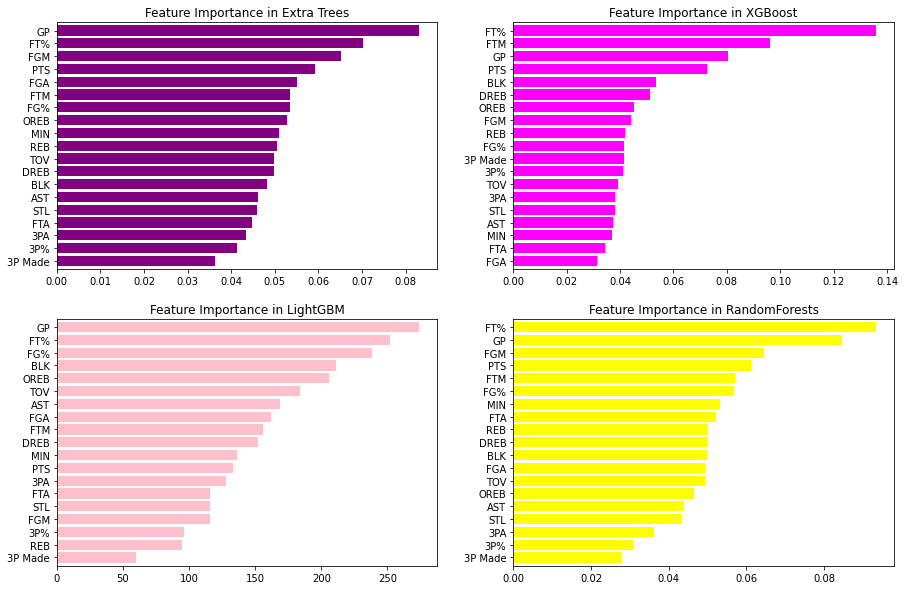

In [24]:
f,ax =plt.subplots(2,2, figsize = (15,10))

pd.Series(extra_model.feature_importances_,X_train.columns).sort_values(ascending=True).plot.barh(width=0.8,color='#800080',ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Extra Trees')
pd.Series(xgb_model.feature_importances_,X_train.columns).sort_values(ascending=True).plot.barh(width=0.8,color='#FF00FF',ax=ax[0,1])
ax[0,1].set_title('Feature Importance in XGBoost')
pd.Series(lgbm_model.feature_importances_,X_train.columns).sort_values(ascending=True).plot.barh(width=0.8,color='#FFC0CB',ax=ax[1,0])
ax[1,0].set_title('Feature Importance in LightGBM')
pd.Series(randomforest_model.feature_importances_,X_train.columns).sort_values(ascending=True).plot.barh(width=0.8,color='#FFFF00',ax=ax[1,1])
ax[1,1].set_title('Feature Importance in RandomForests')


In [25]:
params = {"n_estimators" : [10,50,100,200],
         "max_features" : [1,5,10,20],
         "min_samples_split" : [2,6,9,14]}
search = GridSearchCV(extra_model, param_grid = params, cv=kfold,verbose = 1, n_jobs= 4)
search.fit(X_train,y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=ExtraTreesClassifier(random_state=6), n_jobs=4,
             param_grid={'max_features': [1, 5, 10, 20],
                         'min_samples_split': [2, 6, 9, 14],
                         'n_estimators': [10, 50, 100, 200]},
             verbose=1)

In [27]:
search.best_estimator_

ExtraTreesClassifier(max_features=10, min_samples_split=6, n_estimators=200,
                     random_state=6)

In [28]:
model_tuned = ExtraTreesClassifier(max_features=10, min_samples_split=6, n_estimators=200,
                     random_state=6).fit(X_train,y_train)
results = cross_val_score(model_tuned, X_train, y_train, scoring = "accuracy", cv = kfold, n_jobs=4)

In [29]:
results.mean()

0.7266175266175268

In [35]:
Solution = pd.read_csv("/content/Sample_Submission.csv")
model_tuned = ExtraTreesClassifier(max_features=10, min_samples_split=6, n_estimators=200,
                     random_state=6).fit(X_train,y_train)
y_pred = extra_model.predict(X_test)

In [37]:
y_pred = pd.DataFrame(y_pred, columns = ["prediction"])

In [38]:
y_pred.head()

,prediction
0,0
1,0
2,0
3,0
4,1


In [39]:
y_pred.to_csv("Solution.csv", index=False)